In [113]:
import pandas as pd
import re
import geoip2.database
import matplotlib.pyplot as plt

data = pd.read_csv('Export.csv')
geo = geoip2.database.Reader('GeoLite2-Country.mmdb')

def extract_ip(s):
    if not isinstance(s, str):
        return None
    match = re.search(r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b", s)
    return match.group(0) if match else None

def extract_computer_name(s):
    if not isinstance(s, str):
        return None
    pattern = r'computer:\s(\w+)'
    match = re.search(pattern, s)
    return match.group(1) if match else None

def extract_internal_ip(s):
    if not isinstance(s, str):
        return None
    pattern = r'(?<=<-\s)(10\.\d{1,3}\.\d{1,3}\.\d{1,3}|192\.168\.\d{1,3}\.\d{1,3})'
    match = re.search(pattern, s)
    return match.group(0) if match else None

data['External_IP'] = data['Metadata'].apply(extract_ip)
data['Internal_IP'] = data['Metadata'].apply(extract_internal_ip)
data['CompName'] = data['Metadata'].apply(extract_computer_name)

unique_ips = data['External_IP'].drop_duplicates()

countries = {}
for ip in unique_ips:
    try:
        response = geo.country(ip)
        countries[ip] = response.country.iso_code
    except Exception as e:
        countries[ip] = "Unknown"

total_records = len(countries)
us_records = list(countries.values()).count('US')

country_counts = {}

for country in countries.values():
    if country in country_counts:
        country_counts[country] += 1
    else:
        country_counts[country] = 1

keys = list(country_counts.keys())
values = list(country_counts.values())


In [116]:
all_us = us_records / total_records * 100

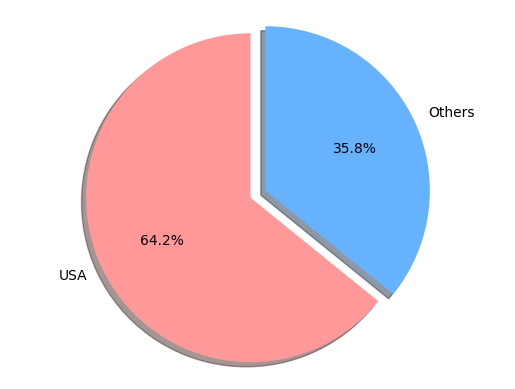

In [119]:
labels = ['USA', 'Others']
sizes = [all_us, 100-all_us]
colors = ['#ff9999','#66b2ff']
explode = ( 0, 0.1 )
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [122]:
#filtered_data = data[data['External_IP'].fillna('').str.startswith("50.205.")]

In [124]:
#filtered_data = filtered_data[filtered_data['CompName'].fillna('').str.startswith("LAPTOP")]